# Chapter 9: Combining Pandas Objects
## Recipes
* [Appending new rows to DataFrames](#Appending-new-rows-to-DataFrames)
* [Concatenating multiple DataFrames together](#Concatenating-multiple-DataFrames-together)
* [Comparing President Trump's and Obama's approval ratings](#Comparing-President-Trump's-and-Obama's-approval-ratings)
* [Understanding the differences between concat, join, and merge](#Understanding-the-differences-between-concat,-join,-and-merge)
* [Connecting to SQL databases](#Connecting-to-SQL-Databases)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Appending new rows to DataFrames

In [2]:
names = pd.read_csv('../notebooks/data/names.csv')
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2


In [3]:
new_data_list = ['Aria', 1]
names.loc[4] = new_data_list
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1


In [4]:
names.loc['five'] = ['Zach', 3]
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3


In [5]:
names.loc[len(names)] = {'Name':'Zayd', 'Age':2}
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2


In [6]:
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2


In [7]:
names.loc[len(names)] = pd.Series({'Age':32, 'Name':'Dean'})
names

,Name,Age
0,Cornelia,70
1,Abbas,69
2,Penelope,4
3,Niko,2
4,Aria,1
five,Zach,3
6,Zayd,2
7,Dean,32


In [8]:
# Use append with fresh copy of names
names = pd.read_csv('../notebooks/data/names.csv')
new_row = pd.DataFrame([{'Name': 'Aria', 'Age': 1}])
names = pd.concat([names, new_row], ignore_index=True)

In [9]:
names.index = ['Canada', 'Canada', 'USA', 'USA', 'USA']
names

,Name,Age
Canada,Cornelia,70
Canada,Abbas,69
USA,Penelope,4
USA,Niko,2
USA,Aria,1


In [10]:
s = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s

Name    Zach
Age        3
Name: 5, dtype: object

In [11]:
s1 = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names))
s2 = pd.Series({'Name': 'Zayd', 'Age': 2}, name='USA')
names = pd.concat([names, s1.to_frame().T], ignore_index=True)
names = pd.concat([names, s2.to_frame().T], ignore_index=True)


In [12]:
bball_16 = pd.read_csv('../notebooks/data/baseball16.csv')
bball_16.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,altuvjo01,2016,1,HOU,AL,161,640,108,216,42,...,96.0,30.0,10.0,60,70.0,11.0,7.0,3.0,7.0,15.0
1,bregmal01,2016,1,HOU,AL,49,201,31,53,13,...,34.0,2.0,0.0,15,52.0,0.0,0.0,0.0,1.0,1.0
2,castrja01,2016,1,HOU,AL,113,329,41,69,16,...,32.0,2.0,1.0,45,123.0,0.0,1.0,1.0,0.0,9.0
3,correca01,2016,1,HOU,AL,153,577,76,158,36,...,96.0,13.0,3.0,75,139.0,5.0,5.0,0.0,3.0,12.0
4,gattiev01,2016,1,HOU,AL,128,447,58,112,19,...,72.0,2.0,1.0,43,127.0,6.0,4.0,0.0,5.0,12.0


In [13]:
data_dict = bball_16.iloc[0].to_dict()
print(data_dict)

{'playerID': 'altuvjo01', 'yearID': 2016, 'stint': 1, 'teamID': 'HOU', 'lgID': 'AL', 'G': 161, 'AB': 640, 'R': 108, 'H': 216, '2B': 42, '3B': 5, 'HR': 24, 'RBI': 96.0, 'SB': 30.0, 'CS': 10.0, 'BB': 60, 'SO': 70.0, 'IBB': 11.0, 'HBP': 7.0, 'SH': 3.0, 'SF': 7.0, 'GIDP': 15.0}


In [14]:
new_data_dict = {k: '' if isinstance(v, str) else np.nan for k, v in data_dict.items()}
print(new_data_dict)

{'playerID': '', 'yearID': nan, 'stint': nan, 'teamID': '', 'lgID': '', 'G': nan, 'AB': nan, 'R': nan, 'H': nan, '2B': nan, '3B': nan, 'HR': nan, 'RBI': nan, 'SB': nan, 'CS': nan, 'BB': nan, 'SO': nan, 'IBB': nan, 'HBP': nan, 'SH': nan, 'SF': nan, 'GIDP': nan}


## There's more...

In [15]:
random_data = []
for i in range(1000):
    d = dict()
    for k, v in data_dict.items():
        if isinstance(v, str):
            d[k] = np.random.choice(list('abcde'))
        else:
            d[k] = np.random.randint(10)
    random_data.append(pd.Series(d, name=i + len(bball_16)))
    
random_data[0].head()

playerID    b
yearID      5
stint       9
teamID      e
lgID        d
Name: 16, dtype: object

In [16]:
%%timeit
bball_16_copy = bball_16.copy()
for row in random_data:
    bball_16_copy = pd.concat([bball_16_copy, pd.DataFrame([row])], ignore_index=True)

254 ms ± 8.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
bball_16_copy = bball_16.copy()
bball_16_copy = pd.concat([bball_16_copy, pd.DataFrame(random_data)], ignore_index=True)

12.1 ms ± 493 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Concatenating multiple DataFrames together

In [18]:
stocks_2016 = pd.read_csv('../notebooks/data/stocks_2016.csv', index_col='Symbol')
stocks_2017 = pd.read_csv('../notebooks/data/stocks_2017.csv', index_col='Symbol')

In [19]:
stocks_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [20]:
stocks_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [21]:
s_list = [stocks_2016, stocks_2017]
pd.concat(s_list)

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


In [22]:
pd.concat(s_list, keys=['2016', '2017'], names=['Year', 'Symbol'])

Shares  Low  High
Year Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300

In [23]:
pd.concat(s_list, keys=['2016', '2017'], axis='columns', names=['Year', None])

Year     2016                2017              
       Shares   Low   High Shares    Low   High
Symbol                                         
AAPL     80.0  95.0  110.0   50.0  120.0  140.0
TSLA     50.0  80.0  130.0  100.0  100.0  300.0
WMT      40.0  55.0   70.0    NaN    NaN    NaN
GE        NaN   NaN    NaN  100.0   30.0   40.0
IBM       NaN   NaN    NaN   87.0   75.0   95.0
SLB       NaN   NaN    NaN   20.0   55.0   85.0
TXN       NaN   NaN    NaN  500.0   15.0   23.0

In [24]:
pd.concat(s_list, join='inner', keys=['2016', '2017'], axis='columns', names=['Year', None])

Year     2016            2017          
       Shares Low High Shares  Low High
Symbol                                 
AAPL       80  95  110     50  120  140
TSLA       50  80  130    100  100  300

## There's more...

In [25]:
stocks_2016 = pd.concat([stocks_2016, stocks_2017], ignore_index=True)


In [26]:
stocks_2015 = stocks_2016.copy()

In [27]:
stocks_2017

,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85
TXN,500,15,23
TSLA,100,100,300


possibly add rule for no duplicate index

# Comparing President Trump's and Obama's approval ratings

In [28]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

trump_url = "https://www.presidency.ucsb.edu/statistics/data/donald-j-trump-public-approval"

try:
    response = requests.get(trump_url)
    response.raise_for_status()  # Check for HTTP errors

    soup = BeautifulSoup(response.content, 'html.parser')
    tables = soup.find_all('table') #find all tables

    if tables:
        df_list = []
        for table in tables:
            df = pd.read_html(str(table))[0] #convert each table to a dataframe.
            df_list.append(df)
        print(len(df_list))
    else:
        print("No tables found in the HTML.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except ValueError as ve:
    print(f"Error parsing HTML: {ve}")

1


/var/folders/7y/fzwln1_93mn3js3wyk61_6xm0000gn/T/ipykernel_90199/4059586068.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0] #convert each table to a dataframe.


In [29]:
df0 = df_list[0]
df0.shape

(143, 5)

In [30]:
df0.head(7)

,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,01/04/2021,01/15/2021,34.0,62.0,4.0
1,12/01/2020,12/17/2020,39.0,57.0,4.0
2,11/05/2020,11/19/2020,43.0,55.0,2.0
3,10/16/2020,10/27/2020,46.0,52.0,2.0
4,09/30/2020,10/15/2020,43.0,55.0,2.0
5,09/14/2020,09/28/2020,46.0,52.0,2.0
6,08/31/2020,09/13/2020,42.0,56.0,2.0


In [31]:
df_list = pd.read_html(trump_url, match='Start Date')
len(df_list)

1

In [33]:
# df_list = pd.read_html(trump_url, match='Start Date', attrs={'align':'center'})
# len(df_list)

In [34]:
trump = df_list[0]
trump.shape

(143, 5)

In [35]:
trump.head(8)

,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,01/04/2021,01/15/2021,34.0,62.0,4.0
1,12/01/2020,12/17/2020,39.0,57.0,4.0
2,11/05/2020,11/19/2020,43.0,55.0,2.0
3,10/16/2020,10/27/2020,46.0,52.0,2.0
4,09/30/2020,10/15/2020,43.0,55.0,2.0
5,09/14/2020,09/28/2020,46.0,52.0,2.0
6,08/31/2020,09/13/2020,42.0,56.0,2.0
7,07/30/2020,08/12/2020,42.0,55.0,3.0


In [37]:
# df_list = pd.read_html(trump_url, match='Start Date', attrs={'align':'center'}, 
#                        header=0, skiprows=[0,1,2,3,5], parse_dates=['Start Date', 'End Date'])
# trump = df_list[0]
# trump.head()

In [38]:
trump = trump.dropna(axis=1, how='all')
trump.head()

,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,01/04/2021,01/15/2021,34.0,62.0,4.0
1,12/01/2020,12/17/2020,39.0,57.0,4.0
2,11/05/2020,11/19/2020,43.0,55.0,2.0
3,10/16/2020,10/27/2020,46.0,52.0,2.0
4,09/30/2020,10/15/2020,43.0,55.0,2.0


In [39]:
trump.isnull().sum()

Start Date       2
End Date         2
Approving        2
Disapproving     2
Unsure/NoData    2
dtype: int64

In [40]:
trump = trump.ffill()
trump.head()

,Start Date,End Date,Approving,Disapproving,Unsure/NoData
0,01/04/2021,01/15/2021,34.0,62.0,4.0
1,12/01/2020,12/17/2020,39.0,57.0,4.0
2,11/05/2020,11/19/2020,43.0,55.0,2.0
3,10/16/2020,10/27/2020,46.0,52.0,2.0
4,09/30/2020,10/15/2020,43.0,55.0,2.0


In [41]:
trump.dtypes

Start Date        object
End Date          object
Approving        float64
Disapproving     float64
Unsure/NoData    float64
dtype: object

In [42]:
def get_pres_appr(pres_num):
    base_url = 'https://www.presidency.ucsb.edu/statistics/data/barack-obama-public-approval'
    pres_url = base_url.format(pres_num)
    df_list = pd.read_html(pres_url, match='Start Date', attrs={'align':'center'}, 
                       header=0, skiprows=[0,1,2,3,5], parse_dates=['Start Date', 'End Date'])
    pres = df_list[0].copy()
    pres = pres.dropna(axis=1, how='all')
    pres['President'] = pres['President'].ffill()
    return pres.sort_values('End Date').reset_index(drop=True)

In [44]:
# obama = get_pres_appr(44)
# obama.head()

In [45]:
pres_41_45 = pd.concat([get_pres_appr(x) for x in range(41,46)], ignore_index=True)
pres_41_45.groupby('President').head(3)

,President,Start Date,End Date,Approving,Disapproving,unsure/no data
0,George Bush,1989-01-24,1989-01-26,51,6,43
1,George Bush,1989-02-24,1989-02-27,60,11,27
2,George Bush,1989-02-28,1989-03-02,62,13,24
158,William J. Clinton,1993-01-24,1993-01-26,58,20,22
159,William J. Clinton,1993-01-29,1993-01-31,53,30,16
160,William J. Clinton,1993-02-12,1993-02-14,51,33,15
386,George W. Bush,2001-02-01,2001-02-04,57,25,18
387,George W. Bush,2001-02-09,2001-02-11,57,24,17
388,George W. Bush,2001-02-19,2001-02-21,61,21,16
656,Barack Obama,2009-01-21,2009-01-23,68,12,21


In [46]:
# pres_41_45['End Date'].value_counts().head(8)

In [47]:
# pres_41_45 = pres_41_45.drop_duplicates(subset='End Date')

In [48]:
# pres_41_45.shape

(3695, 6)

In [49]:
# pres_41_45['President'].value_counts()

Barack Obama          2786
George W. Bush         270
Donald J. Trump        259
William J. Clinton     227
George Bush            153
Name: President, dtype: int64

In [50]:
# pres_41_45.groupby('President', sort=False).median().round(1)

,Approving,Disapproving,unsure/no data
President,,,
George Bush,62.0,22.0,9.0
William J. Clinton,57.0,36.0,6.0
George W. Bush,50.5,45.5,4.0
Barack Obama,47.0,47.0,7.0
Donald J. Trump,39.0,56.0,6.0


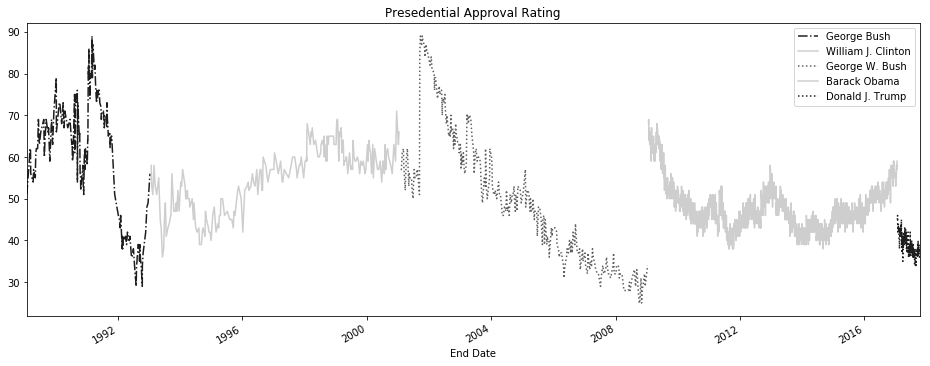

In [51]:
from matplotlib import cm
fig, ax = plt.subplots(figsize=(16,6))

styles = ['-.', '-', ':', '-', ':']
colors = [.9, .3, .7, .3, .9]
groups = pres_41_45.groupby('President', sort=False)

for style, color, (pres, df) in zip(styles, colors, groups):
    df.plot('End Date', 'Approving', ax=ax, label=pres, style=style, color=cm.Greys(color), 
            title='Presedential Approval Rating')

In [52]:
days_func = lambda x: x - x.iloc[0]
pres_41_45['Days in Office'] = pres_41_45.groupby('President') \
                                             ['End Date'] \
                                             .transform(days_func)

In [82]:
pres_41_45['Days in Office'] = pres_41_45.groupby('President')['End Date'].transform(lambda x: x - x.iloc[0])
pres_41_45.groupby('President').head(3)

,President,Start Date,End Date,Approving,Disapproving,unsure/no data,Days in Office
0,George Bush,1989-01-24,1989-01-26,51,6,43,0 days
1,George Bush,1989-02-24,1989-02-27,60,11,27,32 days
2,George Bush,1989-02-28,1989-03-02,62,13,24,35 days
158,William J. Clinton,1993-01-24,1993-01-26,58,20,22,0 days
159,William J. Clinton,1993-01-29,1993-01-31,53,30,16,5 days
160,William J. Clinton,1993-02-12,1993-02-14,51,33,15,19 days
386,George W. Bush,2001-02-01,2001-02-04,57,25,18,0 days
387,George W. Bush,2001-02-09,2001-02-11,57,24,17,7 days
388,George W. Bush,2001-02-19,2001-02-21,61,21,16,17 days
656,Barack Obama,2009-01-21,2009-01-23,68,12,21,0 days


In [83]:
pres_41_45.dtypes

President                  object
Start Date         datetime64[ns]
End Date           datetime64[ns]
Approving                   int64
Disapproving                int64
unsure/no data              int64
Days in Office    timedelta64[ns]
dtype: object

In [86]:
pres_41_45['Days in Office'] = pres_41_45['Days in Office'].dt.days
pres_41_45['Days in Office'].head()

0     0
1    32
2    35
3    43
4    46
Name: Days in Office, dtype: int64

In [87]:
pres_pivot = pres_41_45.pivot(index='Days in Office', columns='President', values='Approving')
pres_pivot.head()

President,Barack Obama,Donald J. Trump,George Bush,George W. Bush,William J. Clinton
Days in Office,,,,,
0,68.0,45.0,51.0,57.0,58.0
1,69.0,45.0,NaN,NaN,NaN
2,67.0,46.0,NaN,NaN,NaN
3,65.0,46.0,NaN,NaN,NaN
4,64.0,45.0,NaN,NaN,NaN


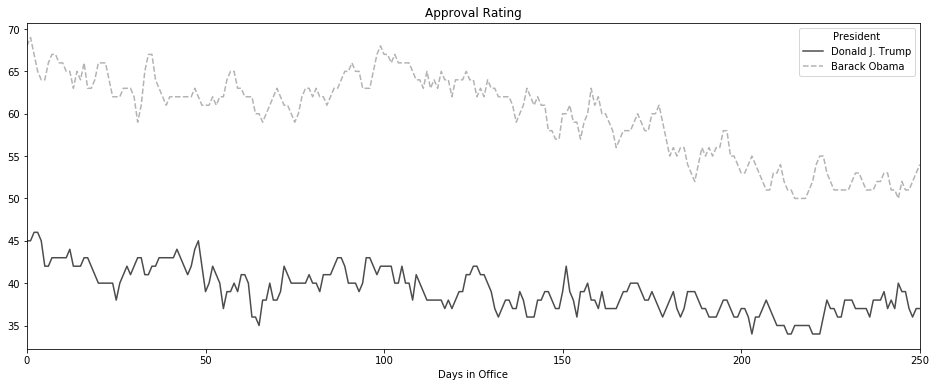

In [88]:
plot_kwargs = dict(figsize=(16,6), color=cm.gray([.3, .7]), style=['-', '--'], title='Approval Rating')
pres_pivot.loc[:250, ['Donald J. Trump', 'Barack Obama']].ffill().plot(**plot_kwargs)

## There's more...

In [89]:
pres_rm = pres_41_45.groupby('President', sort=False) \
                    .rolling('90D', on='End Date')['Approving'] \
                    .mean()
pres_rm.head()

President    End Date  
George Bush  1989-01-26    51.000000
             1989-02-27    55.500000
             1989-03-02    57.666667
             1989-03-10    58.750000
             1989-03-13    58.200000
Name: Approving, dtype: float64

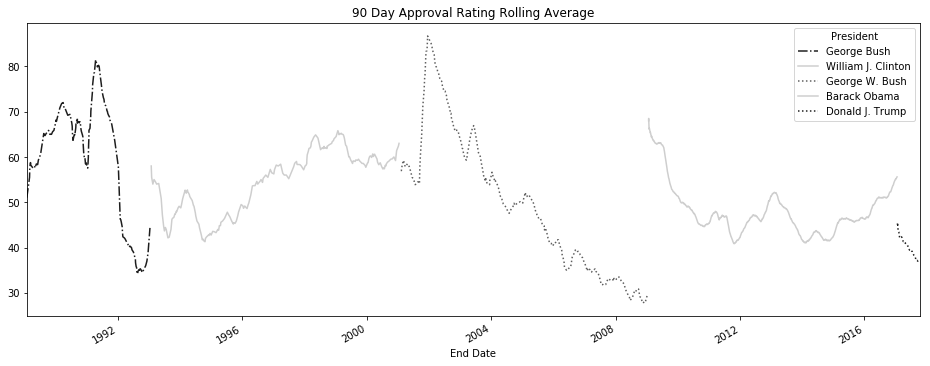

In [90]:
styles = ['-.', '-', ':', '-', ':']
colors = [.9, .3, .7, .3, .9]
color = cm.Greys(colors)
title='90 Day Approval Rating Rolling Average'
plot_kwargs = dict(figsize=(16,6), style=styles, color = color, title=title)
correct_col_order = pres_41_45.President.unique()
pres_rm.unstack('President')[correct_col_order].plot(**plot_kwargs)

# Understanding the differences between concat, join, and merge

In [49]:
from IPython.display import display_html

years = 2016, 2017, 2018
stock_tables = [pd.read_csv('../notebooks/data/stocks_{}.csv'.format(year), index_col='Symbol') 
                for year in years]

def display_frames(frames, num_spaces=0):
    t_style = '<table style="display: inline;"'
    tables_html = [df.to_html().replace('<table', t_style) for df in frames]

    space = '&nbsp;' * num_spaces
    display_html(space.join(tables_html), raw=True)

display_frames(stock_tables, 30)
stocks_2016, stocks_2017, stocks_2018 = stock_tables

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70
,Shares,Low,High
Symbol,,,
AAPL,50,120,140
GE,100,30,40
IBM,87,75,95
SLB,20,55,85


In [50]:
pd.concat(stock_tables, keys=[2016, 2017, 2018])

Shares  Low  High
     Symbol                   
2016 AAPL        80   95   110
     TSLA        50   80   130
     WMT         40   55    70
2017 AAPL        50  120   140
     GE         100   30    40
     IBM         87   75    95
     SLB         20   55    85
     TXN        500   15    23
     TSLA       100  100   300
2018 AAPL        40  135   170
     AMZN         8  900  1125
     TSLA        50  220   400

In [51]:
pd.concat(dict(zip(years,stock_tables)), axis='columns')

2016                2017                 2018               
       Shares   Low   High Shares    Low   High Shares    Low    High
Symbol                                                               
AAPL     80.0  95.0  110.0   50.0  120.0  140.0   40.0  135.0   170.0
TSLA     50.0  80.0  130.0  100.0  100.0  300.0   50.0  220.0   400.0
WMT      40.0  55.0   70.0    NaN    NaN    NaN    NaN    NaN     NaN
GE        NaN   NaN    NaN  100.0   30.0   40.0    NaN    NaN     NaN
IBM       NaN   NaN    NaN   87.0   75.0   95.0    NaN    NaN     NaN
SLB       NaN   NaN    NaN   20.0   55.0   85.0    NaN    NaN     NaN
TXN       NaN   NaN    NaN  500.0   15.0   23.0    NaN    NaN     NaN
AMZN      NaN   NaN    NaN    NaN    NaN    NaN    8.0  900.0  1125.0

In [52]:
stocks_2016.join(stocks_2017, lsuffix='_2016', rsuffix='_2017', how='outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017
Symbol,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0
GE,NaN,NaN,NaN,100.0,30.0,40.0
IBM,NaN,NaN,NaN,87.0,75.0,95.0
SLB,NaN,NaN,NaN,20.0,55.0,85.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0
TXN,NaN,NaN,NaN,500.0,15.0,23.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN


In [53]:
stocks_2016

,Shares,Low,High
Symbol,,,
AAPL,80,95,110
TSLA,50,80,130
WMT,40,55,70


In [54]:
other = [stocks_2017.add_suffix('_2017'), stocks_2018.add_suffix('_2018')]
stocks_2016.add_suffix('_2016').join(other, how='outer')

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
Symbol,,,,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


In [55]:
stock_join = stocks_2016.add_suffix('_2016').join(other, how='outer')
stock_concat = pd.concat(dict(zip(years,stock_tables)), axis='columns')

In [56]:
stock_concat.columns = stock_concat.columns.get_level_values(1) + '_' + \
                            stock_concat.columns.get_level_values(0).astype(str)

In [57]:
stock_concat

,Shares_2016,Low_2016,High_2016,Shares_2017,Low_2017,High_2017,Shares_2018,Low_2018,High_2018
Symbol,,,,,,,,,
AAPL,80.0,95.0,110.0,50.0,120.0,140.0,40.0,135.0,170.0
TSLA,50.0,80.0,130.0,100.0,100.0,300.0,50.0,220.0,400.0
WMT,40.0,55.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN
GE,NaN,NaN,NaN,100.0,30.0,40.0,NaN,NaN,NaN
IBM,NaN,NaN,NaN,87.0,75.0,95.0,NaN,NaN,NaN
SLB,NaN,NaN,NaN,20.0,55.0,85.0,NaN,NaN,NaN
TXN,NaN,NaN,NaN,500.0,15.0,23.0,NaN,NaN,NaN
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,900.0,1125.0


In [58]:
step1 = stocks_2016.merge(stocks_2017, left_index=True, right_index=True, 
                          how='outer', suffixes=('_2016', '_2017'))
stock_merge = step1.merge(stocks_2018.add_suffix('_2018'), 
                          left_index=True, right_index=True, how='outer')

stock_concat.equals(stock_merge)

False

In [59]:
names = ['prices', 'transactions']
food_tables = [pd.read_csv('../notebooks/data/food_{}.csv'.format(name)) for name in names]
food_prices, food_transactions = food_tables
display_frames(food_tables, 30)

,item,store,price,Date
0,pear,A,0.99,2017
1,pear,B,1.99,2017
2,peach,A,2.99,2017
3,peach,B,3.49,2017
4,banana,A,0.39,2017
5,banana,B,0.49,2017
6,steak,A,5.99,2017
7,steak,B,6.99,2017
8,steak,B,4.99,2015
,custid,item,store,quantity


In [60]:
food_transactions.merge(food_prices, on=['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017
1,1,banana,A,10,0.39,2017
2,2,steak,B,3,6.99,2017
3,2,steak,B,3,4.99,2015
4,2,pear,B,1,1.99,2017
5,2,peach,B,2,3.49,2017
6,2,steak,B,1,6.99,2017
7,2,steak,B,1,4.99,2015


In [61]:
food_transactions.merge(food_prices.query('Date == 2017'), how='left')

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [62]:
food_prices_join = food_prices.query('Date == 2017').set_index(['item', 'store'])
food_prices_join

price  Date
item   store             
pear   A       0.99  2017
       B       1.99  2017
peach  A       2.99  2017
       B       3.49  2017
banana A       0.39  2017
       B       0.49  2017
steak  A       5.99  2017
       B       6.99  2017

In [63]:
food_transactions.join(food_prices_join, on=['item', 'store'])

,custid,item,store,quantity,price,Date
0,1,pear,A,5,0.99,2017.0
1,1,banana,A,10,0.39,2017.0
2,2,steak,B,3,6.99,2017.0
3,2,pear,B,1,1.99,2017.0
4,2,peach,B,2,3.49,2017.0
5,2,steak,B,1,6.99,2017.0
6,2,coconut,B,4,NaN,NaN


In [64]:
# Example: Aggregate by summing values
food_transactions_unique = food_transactions.groupby(['item', 'store']).sum()
food_prices_unique = food_prices.groupby(['item', 'store']).sum()

result = pd.concat([food_transactions_unique, food_prices_unique], axis='columns')

print(result)

               custid  quantity  price    Date
item    store                                 
banana  A         1.0      10.0   0.39  2017.0
coconut B         2.0       4.0    NaN     NaN
peach   B         2.0       2.0   3.49  2017.0
pear    A         1.0       5.0   0.99  2017.0
        B         2.0       1.0   1.99  2017.0
steak   B         4.0       4.0  11.98  4032.0
banana  B         NaN       NaN   0.49  2017.0
peach   A         NaN       NaN   2.99  2017.0
steak   A         NaN       NaN   5.99  2017.0


In [66]:
import glob

df_list = []
for filename in glob.glob('../notebooks/data/gas prices/*.csv'):
    df_list.append(pd.read_csv(filename, index_col='Week', parse_dates=['Week']))

gas = pd.concat(df_list, axis='columns')
gas.head()

,Midgrade,Premium,Diesel,All Grades,Regular
Week,,,,,
2017-09-25,2.859,3.105,2.788,2.701,2.583
2017-09-18,2.906,3.151,2.791,2.750,2.634
2017-09-11,2.953,3.197,2.802,2.800,2.685
2017-09-04,2.946,3.191,2.758,2.794,2.679
2017-08-28,2.668,2.901,2.605,2.513,2.399


# Connecting to SQL Databases

In [70]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../notebooks/data/chinook.db')

In [71]:
tracks = pd.read_sql_table('tracks', engine)
tracks.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [72]:
genres = pd.read_sql_table('genres', engine)
genres.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [73]:
genre_track = genres.merge(tracks[['GenreId', 'Milliseconds']], 
                           on='GenreId', how='left') \
                     .drop('GenreId', axis='columns')
genre_track.head()

,Name,Milliseconds
0,Rock,343719
1,Rock,342562
2,Rock,230619
3,Rock,252051
4,Rock,375418


In [74]:
genre_time = genre_track.groupby('Name')['Milliseconds'].mean()
pd.to_timedelta(genre_time, unit='ms').dt.floor('s').sort_values()

Name
Rock And Roll        0 days 00:02:14
Opera                0 days 00:02:54
Hip Hop/Rap          0 days 00:02:58
Easy Listening       0 days 00:03:09
Bossa Nova           0 days 00:03:39
R&B/Soul             0 days 00:03:40
World                0 days 00:03:44
Pop                  0 days 00:03:49
Latin                0 days 00:03:52
Alternative & Punk   0 days 00:03:54
Soundtrack           0 days 00:04:04
Reggae               0 days 00:04:07
Alternative          0 days 00:04:24
Blues                0 days 00:04:30
Rock                 0 days 00:04:43
Jazz                 0 days 00:04:51
Classical            0 days 00:04:53
Heavy Metal          0 days 00:04:57
Electronica/Dance    0 days 00:05:02
Metal                0 days 00:05:09
Comedy               0 days 00:26:25
TV Shows             0 days 00:35:45
Drama                0 days 00:42:55
Science Fiction      0 days 00:43:45
Sci Fi & Fantasy     0 days 00:48:31
Name: Milliseconds, dtype: timedelta64[ns]

In [75]:
cust = pd.read_sql_table('customers', engine, 
                         columns=['CustomerId', 'FirstName', 'LastName'])
invoice = pd.read_sql_table('invoices', engine, 
                            columns=['InvoiceId','CustomerId'])
ii = pd.read_sql_table('invoice_items', engine, 
                       columns=['InvoiceId', 'UnitPrice', 'Quantity'])

In [76]:
cust_inv = cust.merge(invoice, on='CustomerId') \
               .merge(ii, on='InvoiceId')
cust_inv.head()

,CustomerId,FirstName,LastName,InvoiceId,UnitPrice,Quantity
0,1,Luís,Gonçalves,98,1.99,1
1,1,Luís,Gonçalves,98,1.99,1
2,1,Luís,Gonçalves,121,0.99,1
3,1,Luís,Gonçalves,121,0.99,1
4,1,Luís,Gonçalves,121,0.99,1


In [77]:
total = cust_inv['Quantity'] * cust_inv['UnitPrice']
cols = ['CustomerId', 'FirstName', 'LastName']
cust_inv.assign(Total = total).groupby(cols)['Total'] \
                                  .sum() \
                                  .sort_values(ascending=False).head()

CustomerId  FirstName  LastName  
6           Helena     Holý          49.62
26          Richard    Cunningham    47.62
57          Luis       Rojas         46.62
45          Ladislav   Kovács        45.62
46          Hugh       O'Reilly      45.62
Name: Total, dtype: float64

## There's more...

In [78]:
pd.read_sql_query('select * from tracks limit 5', engine)

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99


In [79]:
sql_string1 = '''
select 
    Name, 
    time(avg(Milliseconds) / 1000, 'unixepoch') as avg_time
from (
        select 
            g.Name, 
            t.Milliseconds
        from 
            genres as g 
        join
            tracks as t
            on 
                g.genreid == t.genreid
    )
group by 
    Name
order by 
    avg_time
'''
pd.read_sql_query(sql_string1, engine)

,Name,avg_time
0,Rock And Roll,00:02:14
1,Opera,00:02:54
2,Hip Hop/Rap,00:02:58
3,Easy Listening,00:03:09
4,Bossa Nova,00:03:39
5,R&B/Soul,00:03:40
6,World,00:03:44
7,Pop,00:03:49
8,Latin,00:03:52
9,Alternative & Punk,00:03:54


In [80]:
sql_string2 = '''
select 
      c.customerid, 
      c.FirstName, 
      c.LastName, 
      sum(ii.quantity *  ii.unitprice) as Total
from
     customers as c
join
     invoices as i
          on c.customerid = i.customerid
join
    invoice_items as ii
          on i.invoiceid = ii.invoiceid
group by
    c.customerid, c.FirstName, c.LastName
order by
    Total desc
'''
pd.read_sql_query(sql_string2, engine)

,CustomerId,FirstName,LastName,Total
0,6,Helena,Holý,49.62
1,26,Richard,Cunningham,47.62
2,57,Luis,Rojas,46.62
3,45,Ladislav,Kovács,45.62
4,46,Hugh,O'Reilly,45.62
5,24,Frank,Ralston,43.62
6,28,Julia,Barnett,43.62
7,37,Fynn,Zimmermann,43.62
8,7,Astrid,Gruber,42.62
9,25,Victor,Stevens,42.62
